# THE USA ELECTION 2020 RESULTS ANALYSIS

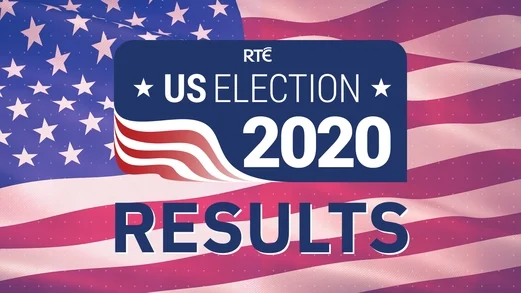

The US elections have been followed closely by many people all around the world. After a period of vagueness, Joe Biden has been announced as the next president of the US.

I have come across a [dataset](https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv) about the 2020 US elections on Kaggle and decided to do the analysis.

Let’s start by importing the libraries and reading the dataset into a pandas dataframe.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
print('Done')

Done


In [2]:
# Reading the dataset and the states code
election = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\1\Dataset\president_county_candidate.csv')
election.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


For each state and county, the dataset contains the number of votes for all candidates. The last column indicates who won the election in a particular county.

I wonder how many counties exist in the US. Let's check the number of counties in the US

In [3]:
# Number of county
election['county'].nunique()

3007

## Number of counties won by each candidate

Let’s check how many counties won by each candidate.

       candidate   won  won_county
13  Donald Trump  True        3125
22     Joe Biden  True        1508


<AxesSubplot:xlabel='candidate', ylabel='won_county'>

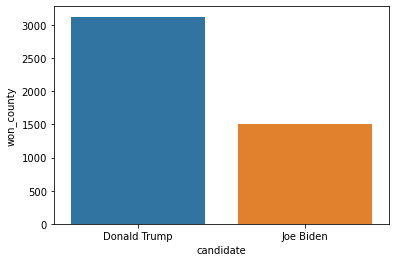

In [76]:
# Number of counties won by each candidate
winner = election[['candidate', 'county', 'won']].groupby(['candidate','won'], as_index = False).count()
winner = winner[winner.won == True]
winner.rename(columns= {'county': 'won_county'}, inplace = True)
print(winner)
sns.barplot(x = winner.candidate, y = winner.won_county)

__The correct number of counties in the US__

You may have noticed the number of counties we calculated at the beginning (3007) is much less than the total number of counties won by Donald Trump and Joe Biden. They must be equal.

What comes to mind is that there are counties with the same name in different states. To find out, we can count the number of unique county names in each state and sum them up. The result must be 4633 (3125 + 1508).

In [19]:
election[['state', 'county']].groupby('county').nunique().sum()

state    4633
dtype: int64

The result is 4633 as we expected.

## Top 10 candidates based on the number of votes

let's find the number of total votes for top ten candidates

In [80]:
election[['candidate', 'total_votes']].groupby('candidate').sum().sort_values(by = 'total_votes', ascending = False)[:10]

,total_votes
candidate,
Joe Biden,80610010
Donald Trump,74179597
Jo Jorgensen,1860222
Howie Hawkins,395366
Write-ins,183436
Rocky De La Fuente,87369
Gloria La Riva,84632
Kanye West,66329
Don Blankenship,60464


## The difference between Joe Biden and Donald Trump

Let’s find out the difference in the number of votes between Joe Biden and Donald Trump for each state.

We first need to calculate the total number of votes in each state for both candidates.

In [31]:
states = election[['candidate', 'state', 'total_votes']].groupby(['state', 'candidate'], as_index = False).sum()
states = states[states.candidate.isin(['Donald Trump', 'Joe Biden'])].reset_index(drop=True)
states.head(10)

,state,candidate,total_votes
0,Alabama,Donald Trump,1441170
1,Alabama,Joe Biden,849624
2,Alaska,Donald Trump,189457
3,Alaska,Joe Biden,153551
4,Arizona,Donald Trump,1661686
5,Arizona,Joe Biden,1672143
6,Arkansas,Donald Trump,759736
7,Arkansas,Joe Biden,423602
8,California,Donald Trump,5947294
9,California,Joe Biden,11032365


The states dataframe contains the total number of votes in each state for Donald Trump and Joe Biden.

We apply the groupby function to the states dataframe and use a lambda expression to calculate the difference.

In [32]:
states[['state','total_votes']].groupby('state')\
.apply(lambda x: x.max() - x.min())\
.sort_values(by='total_votes', ascending=False)[:10]

,total_votes
state,
California,5085071
Illinois,1414687
Massachusetts,1169806
New York,1051866
Maryland,1003390
Washington,784692
New Jersey,724877
Tennessee,710444
Texas,630723


After calculating the difference, we use the sort values function and indexing to get the top 10 states based on the difference in total votes.

The biggest difference was observed in __California.__

## The counties that Joe Biden and Donald Trump got the most votes

In [4]:
# Top ten counties where Joe Biden got the most votes
election[election.candidate == 'Joe Biden'].sort_values(by = 'total_votes', ascending = False).head(10)

,state,county,candidate,party,total_votes,won
28928,California,Los Angeles County,Joe Biden,DEM,3020546,True
1664,Illinois,Cook County,Joe Biden,DEM,1714792,True
31463,Arizona,Maricopa County,Joe Biden,DEM,1040774,True
29049,California,San Diego County,Joe Biden,DEM,963797,True
19490,Texas,Harris County,Joe Biden,DEM,918193,True
26443,Washington,King County,Joe Biden,DEM,906507,True
29007,California,Orange County,Joe Biden,DEM,813974,True
2273,Illinois,Cook Suburbs,Joe Biden,DEM,774473,True
108,Florida,Broward County,Joe Biden,DEM,618752,True
396,Florida,Miami-Dade County,Joe Biden,DEM,617864,True


Similarly, for Donald Trump:

In [5]:
# Top ten counties where Donald Trump got the most votes
election[election.candidate == 'Donald Trump'].sort_values(by = 'total_votes', ascending = False)[:10]

,state,county,candidate,party,total_votes,won
28929,California,Los Angeles County,Donald Trump,REP,1142225,False
31464,Arizona,Maricopa County,Donald Trump,REP,995665,False
19491,Texas,Harris County,Donald Trump,REP,700630,False
29008,California,Orange County,Donald Trump,REP,676478,False
29050,California,San Diego County,Donald Trump,REP,599539,False
1665,Illinois,Cook County,Donald Trump,REP,555001,False
397,Florida,Miami-Dade County,Donald Trump,REP,532833,False
29026,California,Riverside County,Donald Trump,REP,447375,False
13636,Nevada,Clark County,Donald Trump,REP,430930,False
19987,Texas,Tarrant County,Donald Trump,REP,409741,False


Donald Trump lost all 10 counties where he got his most votes. On the other hand, Joe Biden won all 10 of them. This is an indication that Joe Biden won relatively in more populated counties.

## Counties in which candidates have less than 100000 votes

In the previous example, we made an educated guess that indicates Joe Biden won in relatively more populated counties.

Let’s do an example on the smaller counties. We will filter the dataframe based on the total votes of candidates in a county.

In [45]:
small_counties = election[['county','total_votes']]\
.groupby('county', as_index=False)\
.sum().query('total_votes < 100000')['county']

We can now use the small_counties series to filter the elections dataframe. The isin method can be used to filter the dataframe based on the values in a series or list.

In [49]:
election[election.county.isin(small_counties)]\
[['candidate','won']].groupby('candidate').sum()\
.sort_values(by='won', ascending=False).head(2)

,won
candidate,
Donald Trump,2253
Joe Biden,1246


Donald Trump won much more counties than Joe Biden where the total number of votes in the county is less than 100000.

__Thanks for reading !__